In [1]:
import matplotlib as mpl

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

from random import uniform
from decision_tree import DecisionTree


In [14]:
def label(f1,f2):
    if f1 <= 50 and f2 <= 50: return 1
    if f1 <= 50 and f2 > 50 : return 0
    if f1 > 50 and f2 <= 50: return 0
    if f1 > 50 and f2 > 50: return 1


def get_dataset():
    points = [
        (uniform(0,100),uniform(0,100))
        for _ in range(220)
    ]
    labeled_points = [
        [f1,f2,label(f1, f2)]
        for f1,f2 in points
    ]
    return pd.DataFrame(
        data=labeled_points,
        columns=['f1','f2','target'],
        dtype=np.float64,
    )

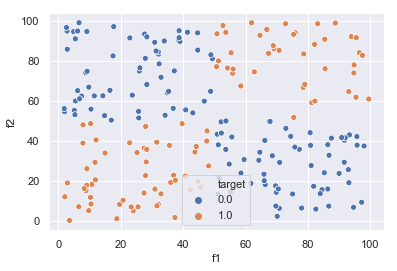

In [21]:
df = get_dataset()
ax = sns.scatterplot(x="f1",y="f2", data=df, hue='target')

In [22]:
dt = DecisionTree()

In [23]:
dt.build_tree(df, 'target')

KeyboardInterrupt: 

In [ ]:
predictions = [
    dt.predict(df.iloc[i])
    for i in range(df.shape[0])
]
targets = list(df['target'].values)
df_res = pd.DataFrame(
    data=zip(predictions, targets),
    columns=['prediction', 'target'],
    dtype=np.float64,
)
df_res